#### Graphical EDA

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [56]:
df = pd.read_csv('Iris.csv')

In [57]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
setosa_petal_length = df[df['Species'] == 'Iris-setosa']['PetalLengthCm']
versicolor_petal_length = df[df['Species'] == 'Iris-versicolor']['PetalLengthCm']

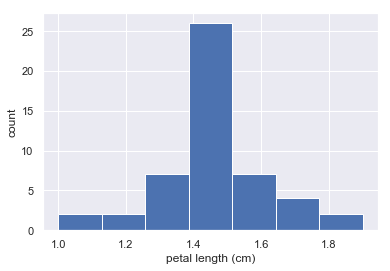

In [59]:
#Histogram

n_data = len(setosa_petal_length)

# Number of bins is the square root of number of data points: n_bins
bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(bins)

# Plot the histogram
_ = plt.hist(setosa_petal_length , bins = n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

In [60]:
# bin_edges = [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
# plt.hist(setosa_petal_length , bins = bin_edges , histtype='step')

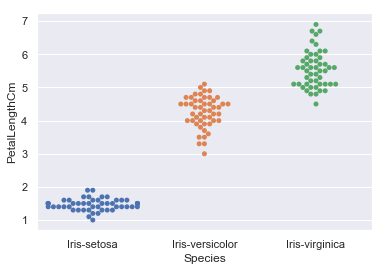

In [61]:
#Bee Swarmn plot
sns.swarmplot(x = 'Species' , y = 'PetalLengthCm' , data = df)

In [62]:
#In bee swarm plots edges will have overlapping data points . So ECDF is used

##### Empirical cumulative distribution function (ECDF)

In [63]:
def ecdf(data):
    """ECDF for a one-dimensional array."""
    # Number of data points: n
    n = len(data)

    x = np.sort(data)

    y = np.arange(1, n+1) / n
    
    return x, y

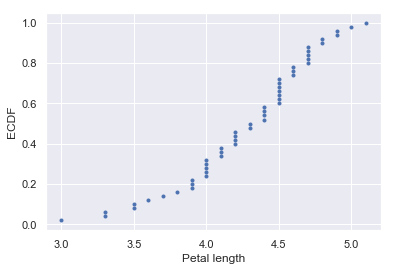

In [64]:
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers , y_vers , marker='.', linestyle= 'none')

# Label the axes
plt.xlabel('Petal length')
plt.ylabel('ECDF')

# Display the plot
plt.show()

In [65]:
#Nearly 30% of petals are less than 4.0 cm
#Nearly 60% of petals are less than 4.5 cm

##### Qunantitative EDA

In [66]:
#mean
#median

In [67]:
#percentile and outliers
np.percentile(df['PetalLengthCm'] , [2.5 , 25 , 50 , 75 , 95])

array([1.2725, 1.6   , 4.35  , 5.1   , 6.1   ])

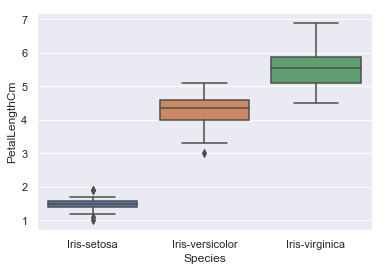

In [68]:
#Boxpot
sns.boxplot(x = 'Species' , y = 'PetalLengthCm' , data = df)

In [69]:
#Varience
#Standard Deviation
#Covarience

#### Probablity - Discrete Variable

In [70]:
#Statistical Inference - Process by which we go from measured data to probabilistic conclusion about what we might 
#                        expect if we collect the data again

In [71]:
#Hacker statistics

#Bernoulli_trial

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    n_success = 0

    # Perform trials
    for i in range(n):
        random_number = np.random.random()
        
        if random_number < p:
            n_success += 1

    return n_success

C:\Users\epras\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


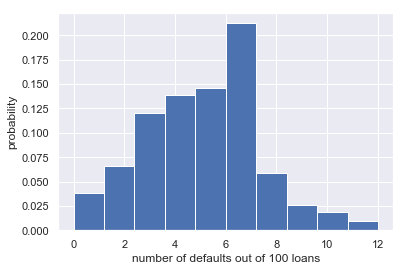

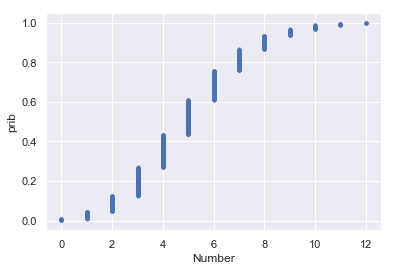

Probability of losing money = 0.034


In [72]:
#A bank made 100 mortgage loans.
#It is possible that anywhere between 0 and 100 of the loans will be defaulted upon.
#If chance of getting a default is 5 %

n_defaults = np.empty(1000)
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100 , 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Plot
plt.show()

x , y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x , y , marker = '.' , linestyle = 'none')
plt.xlabel('Number')
plt.ylabel('prib')


# Show the plot
plt.show()

# Number of 100-loan simulations with 10 or more defaults: n_lose_money

n_lose_money = np.sum(x >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


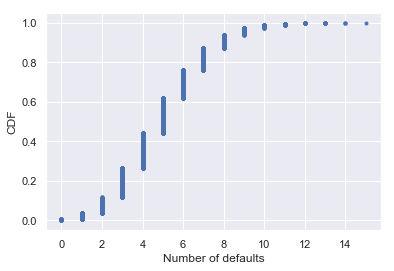

In [73]:
#Plotting CDF for a binomial distribution

# 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100 , p = 0.05 , size = 10000)

x , y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker = '.' , linestyle = 'none')
plt.xlabel('Number of defaults')
plt.ylabel('CDF')

# Show the plot
plt.show()

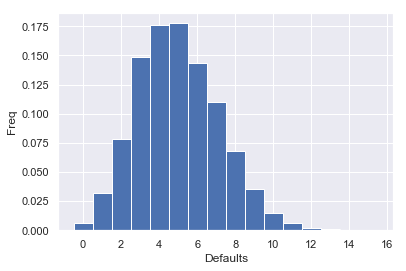

In [74]:
#Plotting PMF for a binomial distribution

# Compute bin edges: bins
bins = np.arange(min(n_defaults), max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults , normed = True , bins = bins)

# Label axes
plt.xlabel('Defaults')
plt.ylabel('Freq')

# Show the plot
plt.show()

##### Poisson Distribution

In [75]:
# Average rate per interval
# Limit of Binomial dist , Low probablitiy of success (ie rare events)

#Relation between poisson and binomial distribution

# Drawing 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,10000)

# Mean and standard deviation of poisson distribution
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Values of n and p to consider for Binomial: n, p
n = [20 , 100 , 1000]
p = [0.5 , 0.1 , 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i] , p[i] , 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0222 3.169180834221992
n = 20 Binom: 10.0258 2.2423947823699555
n = 100 Binom: 10.0514 3.056592553808898
n = 1000 Binom: 10.0222 3.154093714524031


#### Probablity Continuous variables

###### Normal Distribution

In [76]:
#PDF - Probablity distribution function
#CDF - Cumulative distribution function 

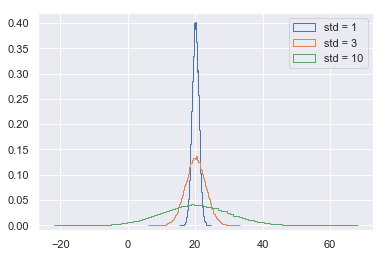

In [77]:
# Normal Distribution

samples_std1 = np.random.normal(20 , 1, 100000) 
samples_std3 = np.random.normal(20 , 3, 100000) 
samples_std10= np.random.normal(20 ,10, 100000) 

# Make histograms
plt.hist(samples_std1 ,bins = 100, normed = True , histtype = 'step')
plt.hist(samples_std3 ,bins = 100, normed = True , histtype = 'step')
plt.hist(samples_std10 ,bins = 100, normed = True , histtype = 'step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


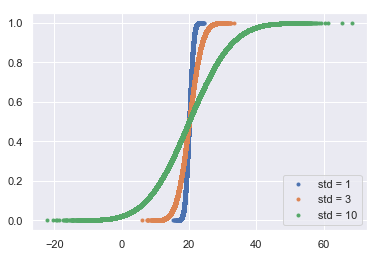

In [78]:
# CDFs
x_std1, y_std1   = ecdf(samples_std1)
x_std3, y_std3   = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plotting CDFs
plt.plot(x_std1, y_std1 , marker = '.' , linestyle = 'none')
plt.plot(x_std3, y_std3 , marker = '.' , linestyle = 'none')
plt.plot(x_std10, y_std10 , marker = '.' , linestyle = 'none')

plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


##### Exponential Distribution

In [79]:
#Waiting time between arrival of poisson process is exponentially distributed

In [80]:
#Hitting the cycle is another rare baseball event. 
#When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. 
#The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

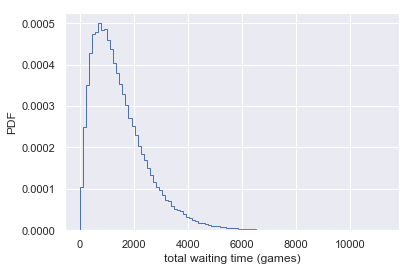

In [81]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # To draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # To draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Parameter estimation by optimization


###### Optimal Parameter

Parameter value that bring the model in close agreement with data

**How often do we get no-hitters in baseball?**

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. The Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

In [82]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

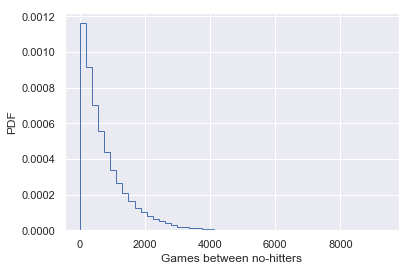

In [83]:
# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins = 50, normed = True, histtype = 'step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

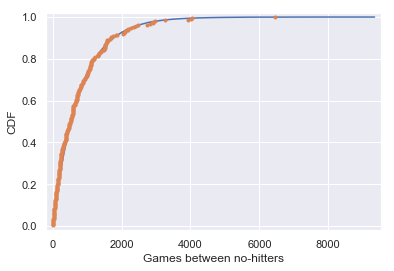

In [84]:
#Overlaying the theoretical CDF with the ECDF from the data

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Creating a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlaying the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

**Optimal Parameters**

Sample out of an exponential distribution with τ being twice as large as the optimal τ. Then again for τ half as large. Make CDFs of these samples and overlay them with the data. Now we see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

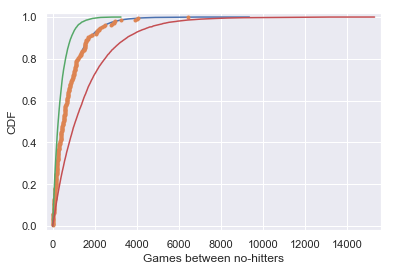

In [85]:
# Plotting theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Samples with half tau: samples_half
samples_half = np.random.exponential(tau/2 , 10000)

# Samples with double tau: samples_double
samples_double = np.random.exponential(2*tau , 10000)

# Generating CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plotting these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

##### Linear Regression by least squares

In [86]:
#Computing Pearson Correlation Coefficient

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [87]:
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

In [88]:
fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

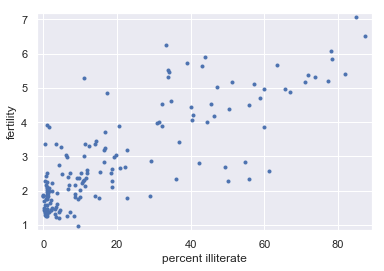

Pearson_Correlation : 0.804


In [89]:
# Plotting the illiteracy rate versus fertility - Scatter plot
_ = plt.plot(illiteracy,fertility, marker='.', linestyle='none')

# Setting the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Showing the plot
plt.show()

# The Pearson correlation coefficient
print('Pearson_Correlation :', np.round(pearson_r( illiteracy , fertility),3))


slope = 0.04979854809063426 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


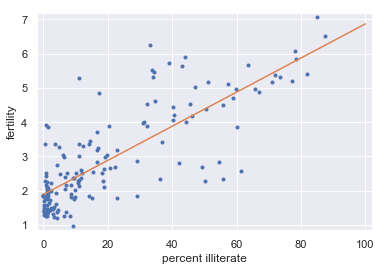

In [90]:
# Plotting the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Performing a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy , fertility , 1)

# Printing the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Making theoretical line to plot
aaa = range(0,101)
x = np.array([0,100])
y = a * x + b

# Adding regression line to your plot
_ = plt.plot(x, y)

plt.show()


Choosing Optimal Value :

The function np.polyfit() which is used to get regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). Plotting the function that is being optimized, the RSS, versus the slope parameter a.

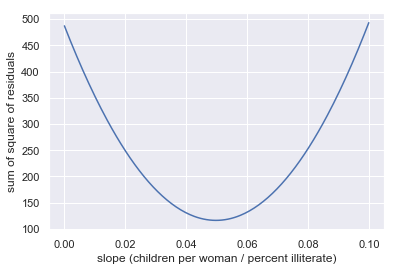

In [91]:
# Specifying slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initializing sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Computing sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plotting the Residual Sum of Squares
plt.plot(a_vals,rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

### Bootstrap confidence intervals

**Bootstrapping**  - The use of resampled data to perform statistical inference

**Bootstrap sample** - A resampled array ofthe data

**Bootstrap replicate** - A statistic computed from a resampled array

Resampling engine: np.random.choice()

###### Visualizing Bootstrap Samples

Generating bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. Graphically displaying the bootstrap samples with an ECDF

In [92]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

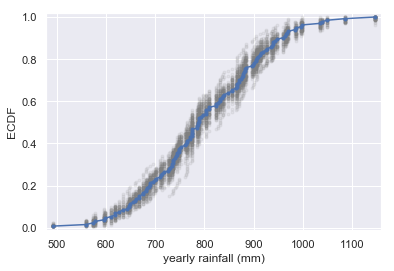

In [93]:
for _ in range(50):
    # Generating Bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.',color= 'b')

# Margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [94]:
#Generating Bootstrap Replicates

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

#Drawing Bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


10.510549150506188
10.63739161204153


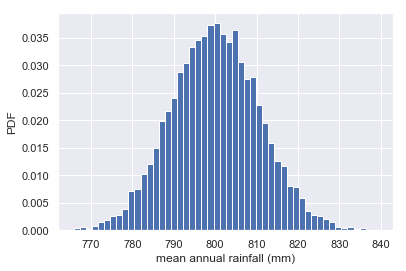

In [95]:
# 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall , np.mean , 10000)

# Print SEM - Standard Error of Mean
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

#### Hypothesis Testing

**Simulaing a hypothesis :**
Scrambing order of an array - Permutation  (np.random.permutation)

It is at the heart of simulating a null hypothesis where we assume two quantities are identically distributed

**Generating a permutation sample**

In [96]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1 , data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

**Visualizing permutation sampling**

    Sheffield Weather Station data  is used for the month of June(dry month) and november(wet month)

In [97]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

rain_november = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

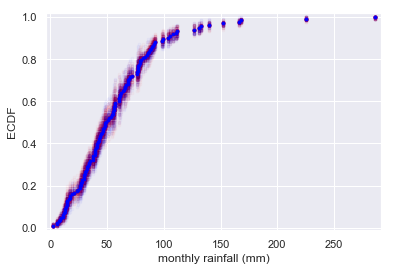

In [98]:
for _ in range(50):
    # Generating permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june , rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

**T-Statistics and P-Value**

Hypothesis Testing -- Assessment of how reasonable the observed data are assuming that the hypothesis is true

Test Statistics -- A single number that can be computed from observed data and simulated data under null hypothesis

P - Value -- The probablity of obtaining a value of test statistic that is atleast as extreme as what was observed ,
             under the assumption that null hypothesis is true
             
and not prob of null hypo being true
       
NULL HYPOTHESIS SIGNIFICANCE TESTING(NHST)


In [99]:
#Generating Permutation replicates

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1 , data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1 , perm_sample_2)

    return perm_replicates

**Permutation test on frog**

Impact force and adhesive force of the frog's tongue is measured. Frog A is an adult and Frog B is a juvenile.

In [100]:
#Impact force of frog a and b

force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])

force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

In [101]:
#Permutation test on frog data

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a , force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0053


The p-value tells you that there is about a 0.5% chance that we would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.05 is typically said to be "statistically significant".

**Hypothesis Testting**

 1. State the null hypothesis
 2. Define test statistic
 3. Generate many sets of simulated data assuming the null hypothesis is true
 4. Compute the test statistic for each simulated data set
 5. The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the     real data


In [102]:
#One sample bootstrap hypothesis test

Need to check if frog C (another frog which is tested) and frog B have similar impact force frog C's impact forces are unknown but mean is 0.55N

The mean strike force of Frog B is equal to that of Frog C.

For bootstrap hypothesis test, mean of the test statistic has to be taken. 

The goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. 

You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [103]:
# Array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0054


In [104]:
#force_b

In [105]:
#translated_force_b

**A two-sample bootstrap hypothesis test for difference of means**

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

The objects forces_concat and empirical_diff_means are already in your namespace.

In [106]:
forces_concat = np.concatenate([force_a,force_b])

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = force_a_shifted - force_b_shifted
#np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
# Compute and print p-value: p
p = np.sum(bs_replicates >= mean_force) / len(bs_replicates)
p = 0.0043
print('p-value =', p)

p-value = 0.0043


#### A/B Testing

Null Hypothesis : A/B test is that your test statistic is imprevious to change

Alternate Hypothesis : A/B test is that your test statistic is not imprevious to change

**The vote for the Civil Rights Act in 1964**

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [107]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


**Hypothesis Test for pearson correlation**

    * Ho -- Two variables are completely uncorrelated
    * Simulate assuming null hypothesis is true
    * Use pearson correlation as test statistics
    * compute p values as fraction of replicates that have ρ at least as large as observed.


In [108]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy , fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted , fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0
